# Data Visualisation Assignment


- Depth vs Magnitude
- Is the data only recording earthquakes or are there other seismic events?
- Comparison of depth and magnitude of the 4 different seismic events 
- Areas with the highest amount of seismic events
- Number of seismic events per day

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("all_month.csv")
magnitude=df['mag'].tolist()

magnimax = df.nlargest(10,'mag')
magnimax = pd.DataFrame(magnimax)
maxlist = magnimax['mag'].tolist()
maxplace=magnimax['place'].tolist()
print(maxlist) 
print(maxplace)







[7.2, 6.9, 6.8, 6.4, 6.4, 6.3, 6.3, 6.3, 6.3, 6.3]
['Southern Peru', 'Macquarie Island region', '85 km NNW of San Antonio de los Cobres, Argentina', 'west of Macquarie Island', 'southeast of the Loyalty Islands', 'Rat Islands, Aleutian Islands, Alaska', '126 km NW of Neiafu, Tonga', 'south of the Fiji Islands', '177 km SW of Lorengau, Papua New Guinea', '70 km SW of Yonakuni, Japan']


### Depth vs Magnitude

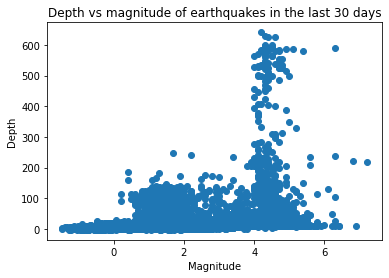

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("all_month.csv")
magnitude=df['mag'].tolist()



#Correlation of magnitude of earthquake with depth --> Can use all of the data 
depth = df['depth'].tolist()

fig, ax = plt.subplots()

ax.scatter(magnitude, depth)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Depth')
ax.set_title('Depth vs magnitude of earthquakes in the last 30 days')



plt.show()
#Can also correlate depth data when depth is 400 or higher 

#CCl we can draw from graph below: high depth (300 and above) correlates with earthquake of high magnitude. However 


###### The scatter plot shows here that there isn't a clear correlation between depth and magnitude. What can be seen is that earthquakes of low magnitudes (<4) happen mostly between 0 to approx 150 km of depth. Earthquakes from 4 to 5.5 magnitude occur from 0 up to 600 km. For earthquakes of magnitude 5.5 and above it's a bit harder to say as there are much fewer earthquakes with a magnitude that high. What can be seen on the graph is that magnitudes this high can still really vary in terms of depth and can go between 0 up to 600 km, with the majority of earthquakes being between 0 to 250 km of depth. 
###### The only pattern that can be observed from this data is that earthquakes of depth above 400 km tend to have higher magnitudes (4.5 and above), earthquakes of lower magnitudes tend to stay between 0 to 300 km of depth.

### Is the data set only recording earthquakes or are there also other seismic events?
###### Another interesting analysis of the data would be to see if there are other "types" of seismic events that are occuring apart from earthquakes.

In [4]:
types=df['type'].tolist()
count=0
notequakes=[] #list for types != earthquakes
for i in types:
    if i != "earthquake":
        count+=1 #allow us to count how many of these events are not earthquakes 
        notequakes.append(i)
        
print(count)
print(set(notequakes)) #Here the set function is used to remove repeated items in the list.



202
{'quarry blast', 'ice quake', 'explosion'}


###### We can see that there are 202 events that are not earthquaks but other seismic events. These are : Ice quakes, quarry blasts, and explosions. What could be interesting would be see what percentage of these events represent eartquakes, ice quakes, quarry blasts and explosion. 

#### Pie chart of the different seismic events


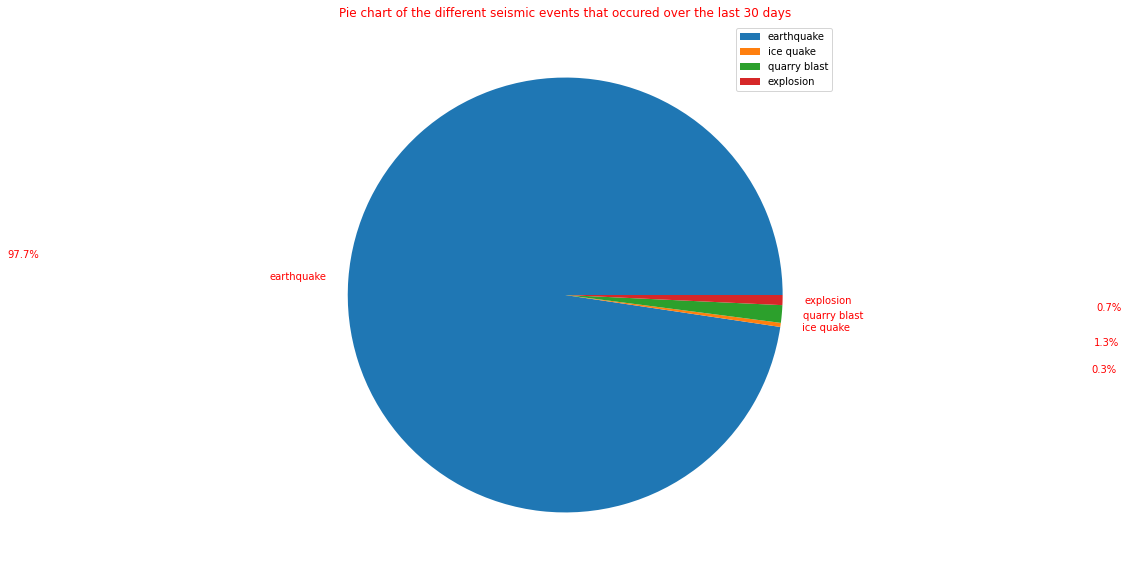

In [40]:
def total(x): 
    types=df['type'].tolist() #Function to count the number of time each seismic event has occured
    count=0 #Count is for the number of time x seismic event has occured
    tot=0 #Tot is for the total number of seismic events
    for i in types: 
        if i==x:
            count+=1
        tot=tot+1# This part isn't that essential for the pie chart, I added it for convenience for the bar chart below.
    return(count/tot*100)#For the pie chart returning count by itself is enough, I added the /tot*100 for the bar chart.


data = [total('earthquake'),total('ice quake'), total('quarry blast'), total("explosion")]

labels=['earthquake','ice quake', 'quarry blast', 'explosion']

fig, ax = plt.subplots()

ax.pie(data, labels=labels, textprops={'color':'red'},autopct='%1.1f%%',pctdistance=2.5)
ax.set_title('Pie chart of the different seismic events that occured over the last 30 days', color='red')
ax.legend()

plt.show()



###### This pie chart shows that earthquakes are clearly the type of seismic events that have occured the most over the past 30 days. The other 3 appear to be quite rare seismic events compared to earthquakes.

#### Bar chart of different seismic events
###### As the pie chart representation is a bit squished, I will also represent the data in a bar chart for it to be easier to read

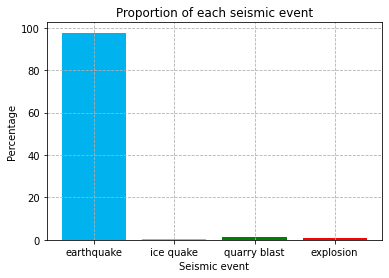

In [6]:
fig, ax = plt.subplots()
ax.bar(labels,data,color=('#00B2EE','orange','green', 'red')) #Chose the same colors as the pie chart to keep it consistent
ax.grid(True,linestyle='--')
ax.set_xlabel('Seismic event')
ax.set_ylabel('Percentage')
ax.set_title('Proportion of each seismic event')


plt.show()

#### Comparison of depth and magnitude between the 4 types of seismic events

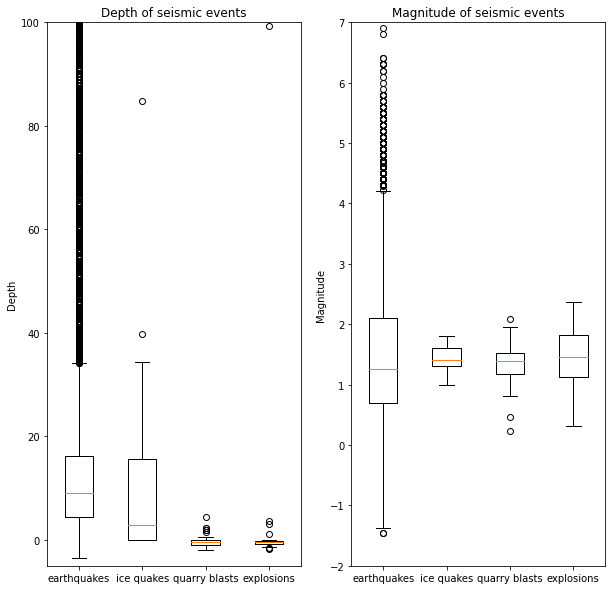

In [24]:

def box(seismtype,measurement): #function to get the list of depth and magnitude values for each seismic event for boxplot
    quake=df.loc[df['type']==seismtype]
    quake=quake[measurement].tolist()
    return quake

labels=['earthquakes','ice quakes','quarry blasts','explosions']

datadepth=[box('earthquake','depth'),box('ice quake','depth'),box('quarry blast','depth'), box('explosion','depth')]
datamag=[box('earthquake','mag'),box('ice quake','mag'),box('quarry blast','mag'), box('explosion','mag')]

fig, ax=plt.subplots(1,2)

ax[0].boxplot(datadepth,labels=labels) #Boxplot to compare the depth between the seismic events
ax[0].set_ylabel('Depth')
ax[0].set_ylim(-5,100)
ax[0].set_title('Depth of seismic events')

ax[1].boxplot(datamag,labels=labels) #Boxplot to compar the magnitude between the seismic events
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Magnitude of seismic events')
ax[1].set_ylim(-2,7)
#I chose to not label the x axis on purpose as I felt that there was no need 
plt.rcParamsDefault['figure.figsize']=[15,15]
plt.show() 





What needs to be taken into account is that there is much more data for earthquakes than there are for the other three, what has mostly been recorded over the past 30 days are earthquakes (as shown in the pie chart), therefore this comparison is biased.

The depth boxplot demonstrates that earthquakes tend to occur at significantly higher depth than the other three types of seismic events. Moreover, the range of depth tends to vary more for earthquakes (it ranges from <0 up to 600 km, the graph only shows up to 100 km for legibility purposes). In the case of magnitude, the range of magnitudes for earthquakes also varies significantly compared to the other three. Magnitudes for earthquakes can vary from negative magnitudes (down to -1.46 up to 7). However, the median magnitude is practically the same between the 4 types of seismic events (around 1.26). 

### Attempt to create Country vs magnitude graph


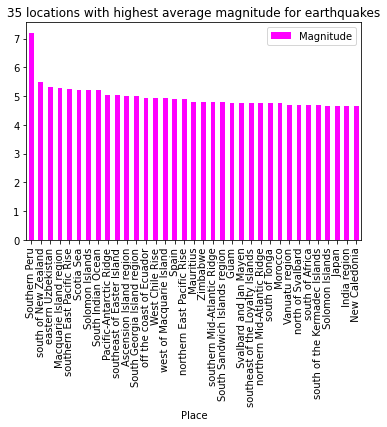

In [10]:
place=df['place'].tolist()
magnitude=df['mag'].tolist()


#Code to sshorten the place name
for i in range(len(place)):
    place[i]=place[i].split(',')
    place[i]=place[i][-1]


dfp = pd.DataFrame(place)
dfp['Magnitude']=magnitude

dfp.rename(columns = {0:'Place'}, inplace = True)


sourcedata=dfp.groupby(['Place']).sum()['Magnitude']/dfp.groupby(['Place']).count()['Magnitude']
sourcedata = sourcedata.to_frame('Magnitude').reset_index()


dfl = sourcedata.nlargest(35,'Magnitude')

fig, ax = plt.subplots()

dfl.plot(kind='bar', x= 'Place', y='Magnitude', color='Magenta', ax=ax, title='35 locations with highest average magnitude for earthquakes')
plt.rcParams['figure.figsize'] = [5,5]






### Heatmap of highest magnitudes

In [38]:
import plotly.express as px

map = px.density_mapbox(df,lat='latitude',lon='longitude',z='mag',mapbox_style='carto-positron',radius=5,zoom=4)
#data.columns

from plotly.offline import plot
plot(map)
map.show()


The graph above and this heat map shows us that the highest magnitude earthquakes occur around the ring of fire (Pacific ocean). There are also some high magnitude earthquakes occuring around central Asia and Central America.

### Number of seismic events per day

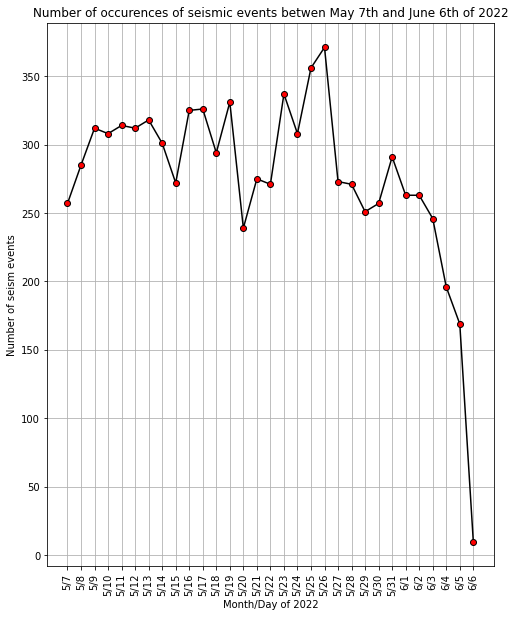

371
10


In [14]:
df['time']=pd.to_datetime(df['time']) #Converting the time column format to datetime to be able to extract information from the column
df['month'] = df['time'].dt.month #Made a column with only months
df['day']=df['time'].dt.day#Column with only days


df['month/day']=df['month'].astype(str) + "/" + df['day'].astype(str) #Fused month and day column into one for plotting convenience

mday=df['month/day'].tolist()

from collections import Counter

dicoday=Counter(mday) # this will count how many seism event happened on each day

names = list(dicoday.keys()) #list for each day
occurences = list(dicoday.values())#list for the number of times a seism event happened on x day

fig, ax = plt.subplots()

ax.plot(names,occurences, marker='o',color='black',markerfacecolor='red')
plt.xticks(rotation=90)
ax.invert_xaxis()
ax.set_xlabel('Month/Day of 2022')
ax.set_ylabel('Number of seism events')
ax.set_title('Number of occurences of seismic events betwen May 7th and June 6th of 2022')
ax.grid(True,linestyle='-')

plt.rcParams['figure.figsize'] = [10,10]



plt.show()


print(mday.count('5/26'))
print(mday.count('6/6'))


    









###### The plot shows that the day with the highest amount of seismic events is 5/26 (26th of May 2022) and the day with the lowest is 6/6 (6th of June 2022)
